In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect , func


In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
inspector = inspect(engine)
inspector.get_table_names()
# reflect the tables
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(autoload_with=engine)

In [9]:
# Save references to each table
Base.classes.keys()


['station', 'measurement']

In [10]:
# Create our session (link) from Python to the DB
Measurement = Base.classes.measurement
Station = Base.classes.station

# Exploratory Precipitation Analysis

In [11]:
session = Session(engine)

In [20]:
# find the most recent date from dataset
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date
# Query to find the most recent date in the Measurement table
# Explanation:
# - 'Measurement.date' refers to the 'date' column in the 'Measurement' table.
# - 'func.max()' is an SQLAlchemy function that calculates the maximum value (in this case, the latest date).
# - 'session.query()' is used to query the database.
# - '.first()' retrieves the first (and only) row from the result of the query.
# most_recent_date = session.query(func.max(Measurement.date)).first()

# Context:
# - This step is essential for understanding the temporal coverage of the dataset.
# - The most recent date will serve as the reference point for subsequent precipitation analysis.
# - For example, you might analyze precipitation trends over the last year, last month, or another period relative to this date.

# Print or use the result to ensure the correct date is fetched

('2017-08-23',)

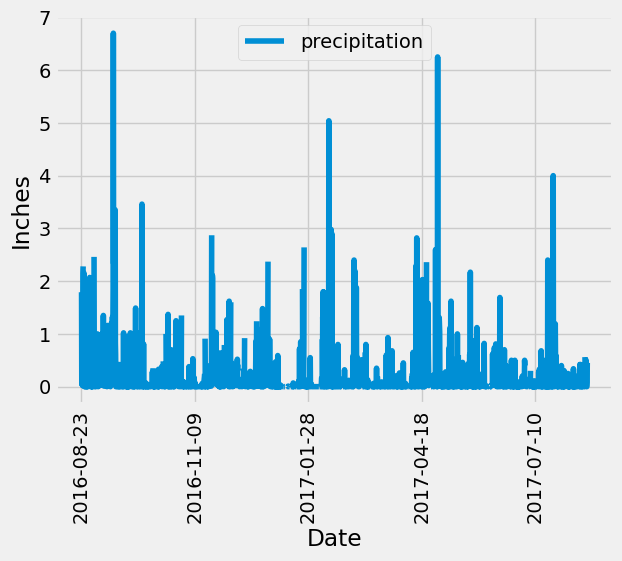

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#Calculate the date one year prior to the most recent date.
# Explanation:
# - 'dt.timedelta(days=365)' creates a time duration of 365 days.
# - Subtracting this timedelta from the most recent date gives the corresponding date one year earlier.
# Context:
# - This calculation sets the time window for analyzing precipitation trends over the last year.
# - It ensures that the analysis considers data points exactly one year prior to the dataset's endpoint, providing consistency.
# - Precipitation data for this one-year period can help identify seasonal patterns, changes, or trends in weather conditions.


# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Perform a query to retrieve the date and precipitation scores for the last year.
# Explanation:
# - 'session.query()' is used to construct a query for specific columns in the Measurement table.
# - 'Measurement.date' refers to the date column in the dataset.
# - 'Measurement.prcp' refers to the precipitation (prcp) column, which contains precipitation data in inches.
# - '.filter(Measurement.date >= prev_year)' filters the data to include only records with dates greater than or equal to 'prev_year' (one year prior to the most recent date).
# - '.all()' retrieves all results that match the query as a list of tuples (date, precipitation).
# Context:
# - This query extracts the necessary data for analyzing precipitation trends over the last year of available records.
# - Filtering by 'prev_year' ensures that the dataset focuses on the most recent one-year period, aligning with seasonal or temporal analyses.
# - The result can be used to calculate summary statistics (e.g., total precipitation, average daily rainfall, number of rainy days).
# - Identifying patterns or anomalies in precipitation during this period is crucial for understanding weather impacts on agriculture, urban planning, and climate studies.


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])
# Convert the query results to a Pandas DataFrame.
# Explanation:
# - 'pd.DataFrame(results)' creates a DataFrame from the query results, which is a list of tuples (date, precipitation).
# - 'columns=['date', 'precipitation']' explicitly names the columns for the DataFrame.
# - The 'date' column will contain the dates from the query, while the 'precipitation' column will store the corresponding precipitation values.
# Context:
# - Using a Pandas DataFrame allows for easy manipulation, analysis, and visualization of the data.
# - This structure is ideal for calculating summary statistics such as mean, median, total precipitation, and counts of non-missing values.
# - With the DataFrame, you can also handle missing or null values (e.g., `NaN`) efficiently before analysis.


# Sort the dataframe by date
df = df.sort_values("date")
# Sort the DataFrame by the 'date' column in ascending order.
# Explanation:
# - 'df.sort_values("date")' sorts the DataFrame rows based on the values in the 'date' column.
# - By default, sorting is in ascending order (earliest to latest dates).
# - Sorting ensures that the data is in chronological order, which is essential for time-series analysis and visualization.
# Context:
# - Chronologically ordered data is crucial for identifying trends, patterns, and seasonality in precipitation data.
# - Sorting also makes it easier to aggregate data by time periods (e.g., monthly, seasonal) or visualize the progression of rainfall over time.


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date' , y='precipitation' , rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

plt.show()
#Plot the precipitation data using Pandas' built-in plotting functionality.
# Explanation:
# - 'df.plot()' generates a plot directly from the DataFrame.
# - 'x='date'' specifies the x-axis, using the 'date' column.
# - 'y='precipitation'' specifies the y-axis, using the 'precipitation' column.
# - 'rot=90' rotates the x-axis labels by 90 degrees for better readability, especially with date labels.
# Add axis labels to provide context for the plot.
#plt.xlabel("Date")  # Label for the x-axis, indicating time progression.
#plt.ylabel("Inches")  # Label for the y-axis, indicating precipitation values.
#plt.show()# Display the plot.
# Context:
# - **Purpose:** This visualization helps to observe trends, patterns, or anomalies in precipitation data over the time period of interest.
# - **Key Features:**
#   - Spikes in the plot indicate days with significant rainfall.
#   - Gaps or flat sections might highlight periods with missing data or no precipitation.
#   - Seasonal trends or unusual weather events can be identified visually.

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
   group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
   filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

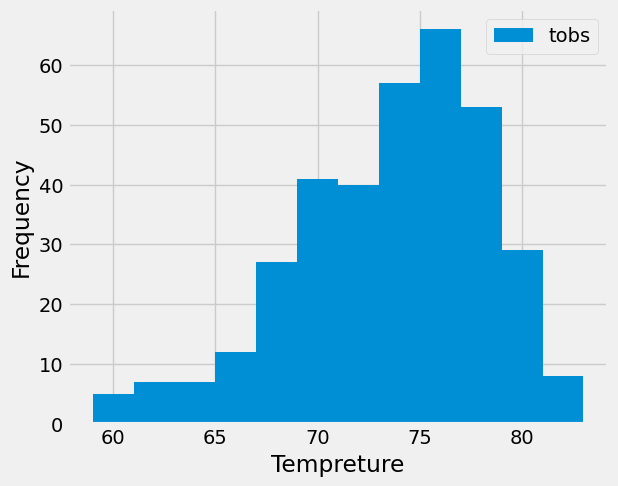

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
   filter(Measurement.station == 'USC00519281').\
   filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Tempreture")


plt.show()

# Close Session

In [19]:
# Close Session
session.close()

# Conclusion:
# The precipitation analysis highlights the distribution and variability of rainfall over the last 12 months.
# The plot shows periods of high and low precipitation, indicating seasonal trends.
# The summary statistics provide an overview of rainfall patterns, including the mean, minimum, and maximum precipitation.
# This data is valuable for understanding weather conditions and their potential impact on the region.
